Outcome Visualization

In [1]:
suf = "1222_230658"
suf_f = "1222_140218"
img_title = "HAM10000"
n_classes = 7

In [2]:
import numpy as np
import os
data_root = "C:/Users/20878/221Project/HAM10K/tmp/HAM10000"
# Load the .npy file
def bdnm(name, suf=suf):
    return name + suf + ".npy"

dict_batch = np.load(os.path.join(data_root, suf, bdnm("HAM10000_dict_batch_")), allow_pickle=True).reshape(1)[0]
dict_imgSize = np.load(os.path.join(data_root, suf, bdnm("HAM10000_dict_imgSize_")), allow_pickle=True).reshape(1)[0]

train_loss_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_train_loss_", suf=suf_f)))
train_acc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_train_acc_", suf=suf_f)))

test_loss_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_test_loss_")))
test_acc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_test_acc_")))
test_auc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_test_auc_")))

val_loss_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_val_loss_", suf=suf_f)))
val_acc_list = np.load(os.path.join(data_root, suf, bdnm("HAM10000_val_acc_", suf=suf_f)))
           

In [3]:
import seaborn as sns

from utils import ImageShow,draw_size_acc,one_hot
from utils import confusion_matrix,metrics_scores,pff

In [4]:
show = ImageShow(train_loss_list = train_loss_list,
                 train_acc_list = train_acc_list,
                test_loss_list = test_loss_list,
                test_acc_list = test_acc_list,
                test_auc_list = test_auc_list,
                val_loss_list = val_loss_list,
                val_acc_list = val_acc_list,
                )

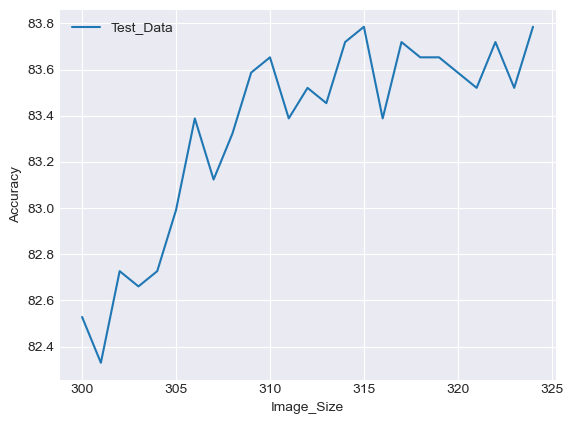

In [5]:
draw_size_acc(dict_imgSize,custom_path='./tmp',img_title=img_title,suf=suf)

In [6]:
import torch
test_evl_result = torch.load(os.path.join(data_root, suf, "best_test_evl_result.pth"))
val_evl_result = torch.load(os.path.join(data_root, suf, "best_evl_result.pth")) 
cla_dict = {0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}
metrics_scores(test_evl_result,n_classes,cla_dict)

+--------+-----------+--------+-------+----------+
|  Type  | Precision | Recall |   F1  | Accuracy |
+--------+-----------+--------+-------+----------+
| akiec  |   0.6667  | 0.512  | 0.579 |          |
|  bcc   |   0.7952  |  0.71  |  0.75 |          |
|  bkl   |   0.7444  | 0.618  | 0.675 |          |
|   df   |   0.7368  | 0.318  | 0.444 |          |
|  mel   |   0.8227  | 0.678  | 0.744 |          |
|   nv   |   0.8648  | 0.972  | 0.916 |          |
|  vasc  |   0.9118  | 0.886  | 0.899 |          |
| Total: |           |        |       |  0.8379  |
+--------+-----------+--------+-------+----------+


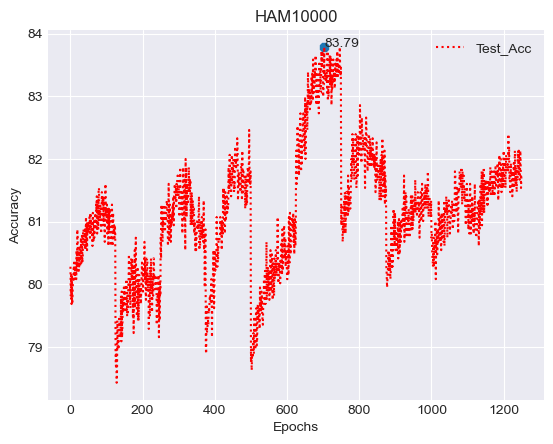

In [7]:
show.test(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

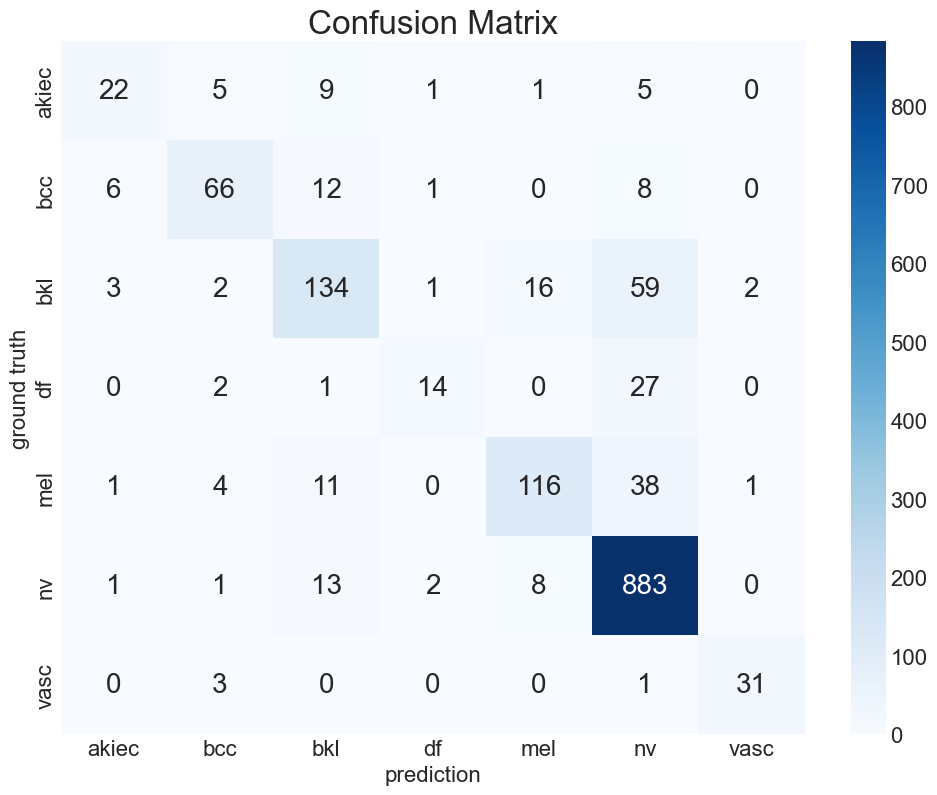

In [8]:
confusion_matrix(test_evl_result,n_classes,cla_dict,kn="test",img_title=img_title,suf=suf)

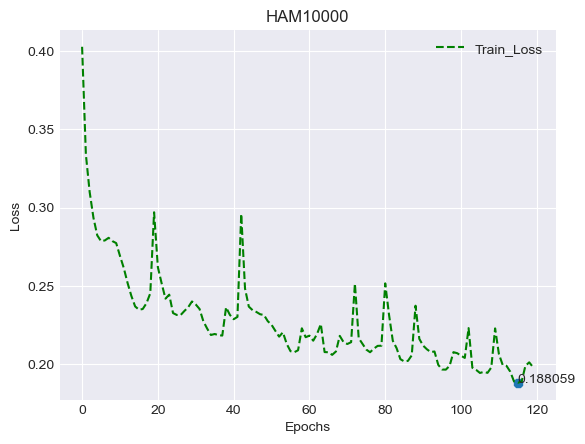

In [9]:
show.train(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

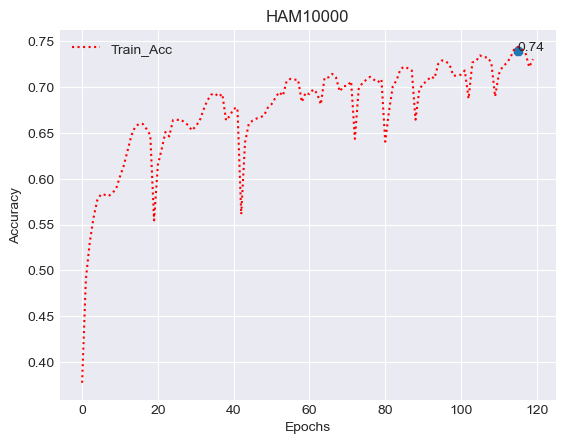

In [10]:
show.train(opt='Acc',write=True,custom_path='./tmp',img_title=img_title,suf=suf)

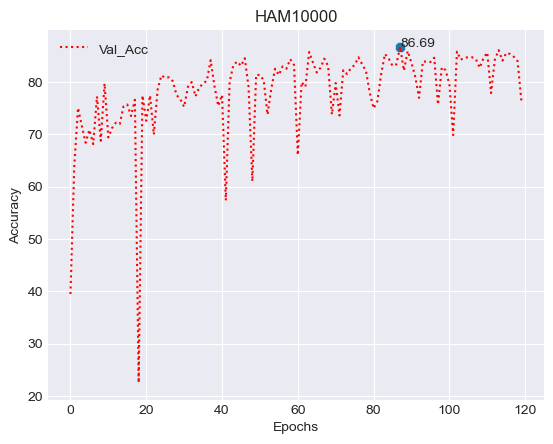

In [11]:
show.val(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

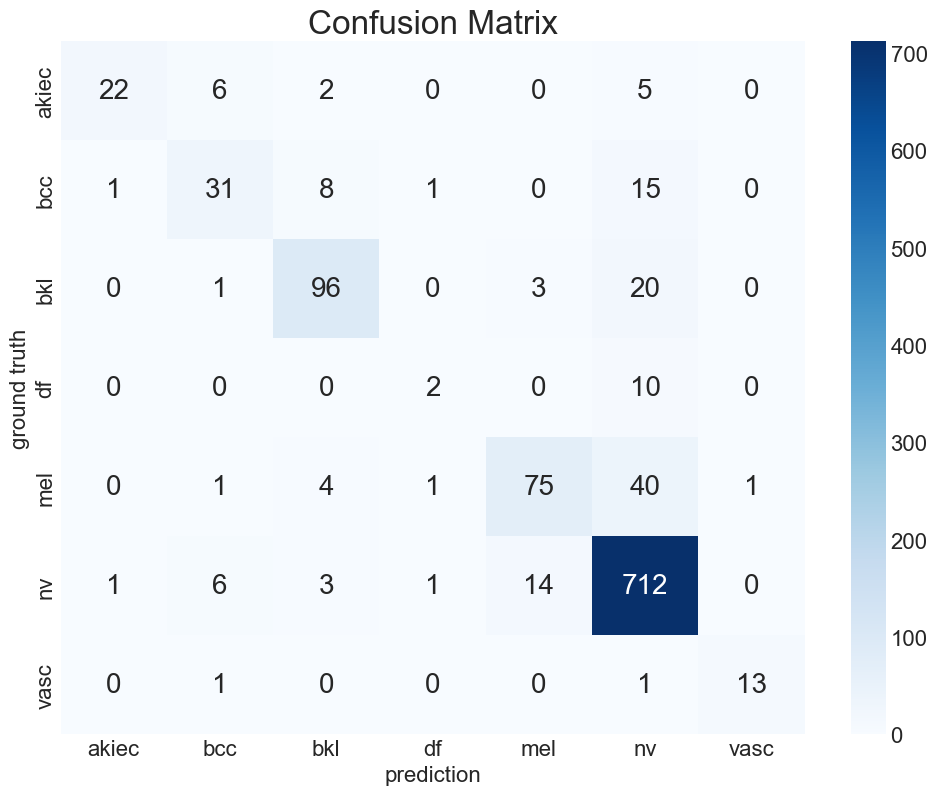

In [12]:
confusion_matrix(val_evl_result,n_classes,cla_dict,kn="val",img_title=img_title,suf=suf)